<a href="https://colab.research.google.com/github/SidharthArya/Deep_Learning_Class_Manit/blob/main/Assignments/002_Gates_Using_Perceptron_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Model
Perceptron model has an accumulator 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
# Transfer/Activation Functions
def step(x):
  return x >= 0

In [3]:
class Perceptron:
  def __init__(self,features=1, alpha=0.1, bias=np.random.normal(loc=0.0,scale=0.01), weights=None, activation=step):
    if weights is None:
      self.weights=np.random.normal(loc=0.0, scale=0.01, size=features).transpose()
    else: self.weights = weights 
    self.activation = activation
    self.alpha = alpha
    self.bias=bias
    self.features = features

  def __predict(self, inputn): # Private Function
    # implement prediction of 1 instance
    if self.features is 1:
      return self.activation(self.weights*inputn + self.bias)[0]
    else:
     return self.activation(self.weights.dot(inputn.transpose()) + self.bias)
    
      
      
  def cost(self, inputn, outputn ):
    # Implement the cost function
    return self.__predict(inputn) - outputn
  

  def predict(self, inputs):
      if self.features is 1:
        return self.activation(self.weights*(inputs) + self.bias)
      else:
        return self.activation(self.weights.dot(inputs.transpose()) + self.bias)
      
        
  

  def train(self, inputs, outputs, epochs=1):   
    t = tqdm.tqdm(range(epochs))
    for epoch in t:
      for i, inputn in enumerate(inputs):
        delta = self.__predict(inputn) - outputs[i]
        t.set_postfix({"loss": delta})
        #print(delta, inputn, outputs[i], self.weights, self.bias)
        self.weight_update(delta, inputn)

  
  def weight_update(self, delta, inputs):
      self.weights = self.weights - self.alpha*delta*(inputs)
      self.bias = self.bias - self.alpha*delta
      #print(self.weights, self.bias)


## And Gate

In [4]:
perceptron=Perceptron(features=2) # Single Perceptron

In [5]:
# Input output for AND Gate
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
              ])
Y = np.array([0,
              0,
              0,
              1
              ])

### Before Training

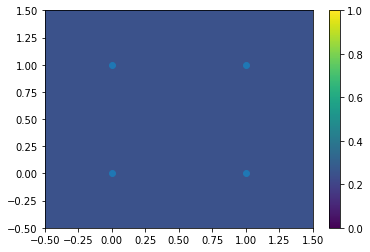

In [6]:
x=np.linspace(-0.5, 1.5, 200)

xx, yy = np.meshgrid(x, x)
Z = perceptron.predict(np.array([xx.ravel(),yy.ravel()]).T)

plt.contourf(xx, yy, Z.reshape(xx.shape), levels=1)
plt.scatter(X[:,0],X[:,1])
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.colorbar();

In [7]:
perceptron.predict(X)

array([False, False, False, False])

### Training

In [8]:
perceptron.train(X,Y,epochs=20)

100%|██████████| 20/20 [00:00<00:00, 273.45it/s, loss=0]


### After Training

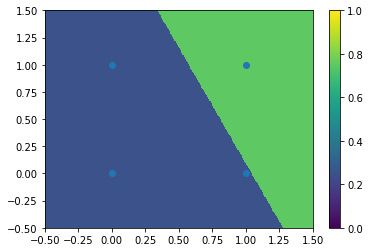

In [9]:
x=np.linspace(-0.5, 1.5, 200)

xx, yy = np.meshgrid(x, x)
Z = perceptron.predict(np.array([xx.ravel(),yy.ravel()]).T)

plt.contourf(xx, yy, Z.reshape(xx.shape), levels=1)
plt.scatter(X[:,0],X[:,1])
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.colorbar();

In [10]:
perceptron.predict(X)

array([False, False, False,  True])

## Or Gate

In [11]:
# Input output for AND Gate
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
              ])
Y = np.array([1,
              1,
              1,
              0
              ])

In [12]:
perceptron=Perceptron(features=2)

### Before Training


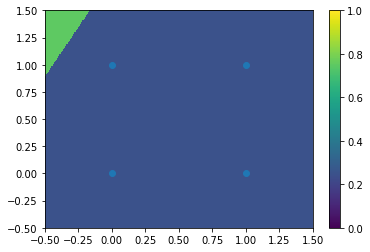

In [13]:
x=np.linspace(-0.5, 1.5, 200)

xx, yy = np.meshgrid(x, x)
Z = perceptron.predict(np.array([xx.ravel(),yy.ravel()]).T)

plt.contourf(xx, yy, Z.reshape(xx.shape), levels=1)
plt.scatter(X[:,0],X[:,1])
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.colorbar();

In [14]:
perceptron.predict(X)

array([False, False, False, False])

### Training

In [15]:
perceptron.train(X,Y,epochs=20)

100%|██████████| 20/20 [00:00<00:00, 316.23it/s, loss=0]


### After Training

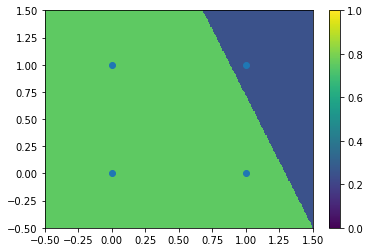

In [16]:
x=np.linspace(-0.5, 1.5, 200)

xx, yy = np.meshgrid(x, x)
Z = perceptron.predict(np.array([xx.ravel(),yy.ravel()]).T)

plt.contourf(xx, yy, Z.reshape(xx.shape), levels=1)
plt.scatter(X[:,0],X[:,1])
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.colorbar();

In [17]:
perceptron.predict(X)

array([ True,  True,  True, False])